In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("vishakhdapat/customer-segmentation-clustering")

print("Path to dataset files:", path)

100%|██████████| 62.0k/62.0k [00:00<00:00, 195kB/s]

Extracting files...
Path to dataset files: C:\Users\HP\.cache\kagglehub\datasets\vishakhdapat\customer-segmentation-clustering\versions\1


In [206]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [207]:
df=pd.read_csv('customer_segmentation.csv')

In [208]:
# Id: Unique identifier for each individual in the dataset.
# Year_Birth: The birth year of the individual.
# Education: The highest level of education attained by the individual.
# Marital_Status: The marital status of the individual.
# Income: The annual income of the individual.
# Kidhome: The number of young children in the household.
# Teenhome: The number of teenagers in the household.
# Dt_Customer: The date when the customer was first enrolled or became a part of the company's database.
# Recency: The number of days since the last purchase or interaction.
# MntWines: The amount spent on wines.
# MntFruits: The amount spent on fruits.
# MntMeatProducts: The amount spent on meat products.
# MntFishProducts: The amount spent on fish products.
# MntSweetProducts: The amount spent on sweet products.
# MntGoldProds: The amount spent on gold products.
# NumDealsPurchases: The number of purchases made with a discount or as part of a deal.
# NumWebPurchases: The number of purchases made through the company's website.
# NumCatalogPurchases: The number of purchases made through catalogs.
# NumStorePurchases: The number of purchases made in physical stores.
# NumWebVisitsMonth: The number of visits to the company's website in a month.
# AcceptedCmp3: Binary indicator (1 or 0) whether the individual accepted the third marketing campaign.
# AcceptedCmp4: Binary indicator (1 or 0) whether the individual accepted the fourth marketing campaign.
# AcceptedCmp5: Binary indicator (1 or 0) whether the individual accepted the fifth marketing campaign.
# AcceptedCmp1: Binary indicator (1 or 0) whether the individual accepted the first marketing campaign.
# AcceptedCmp2: Binary indicator (1 or 0) whether the individual accepted the second marketing campaign.
# Complain: Binary indicator (1 or 0) whether the individual has made a complaint.
# Z_CostContact: A constant cost associated with contacting a customer.
# Z_Revenue: A constant revenue associated with a successful campaign response.

# Response: Binary indicator (1 or 0) whether the individual responded to the marketing campaign.

In [209]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [210]:
df.shape

(2240, 29)

In [211]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   str    
 3   Marital_Status       2240 non-null   str    
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   str    
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   int64  
 16 

In [212]:
#  Finding and Handling The Null Values
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [213]:
df.shape

(2240, 29)

In [214]:
df.dropna(inplace=True)

In [215]:
df.shape

(2216, 29)

In [216]:
df.isna().sum().sum()

0

In [217]:
df.describe()#include='all'

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.0,2216.0,2216.000000
mean,5588.353339,1968.820397,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,...,5.319043,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,3.0,11.0,0.150271
std,3249.376275,11.985554,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,...,2.425359,0.261106,0.261842,0.260367,0.244950,0.115588,0.096907,0.0,0.0,0.357417
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2814.750000,1959.000000,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8421.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [218]:
for col in df.select_dtypes(include=["object", "category"]).columns:
    print(f"\nColumn: {col}")
    print(df[col].value_counts())



Column: Education
Education
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: count, dtype: int64

Column: Marital_Status
Marital_Status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

Column: Dt_Customer
Dt_Customer
31-08-2012    12
12-05-2014    11
12-09-2012    11
14-02-2013    11
22-05-2014    10
              ..
01-11-2013     1
10-08-2013     1
11-10-2012     1
20-12-2012     1
09-01-2014     1
Name: count, Length: 662, dtype: int64


C:\Users\HP\AppData\Local\Temp\ipykernel_10512\2631460929.py:1: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  for col in df.select_dtypes(include=["object", "category"]).columns:


In [219]:
#  Data Cleaning And Feature Engineering 
df['Dt_Customer']=pd.to_datetime(df['Dt_Customer'],dayfirst=True)

In [220]:
df.info()

<class 'pandas.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2216 non-null   int64         
 1   Year_Birth           2216 non-null   int64         
 2   Education            2216 non-null   str           
 3   Marital_Status       2216 non-null   str           
 4   Income               2216 non-null   float64       
 5   Kidhome              2216 non-null   int64         
 6   Teenhome             2216 non-null   int64         
 7   Dt_Customer          2216 non-null   datetime64[us]
 8   Recency              2216 non-null   int64         
 9   MntWines             2216 non-null   int64         
 10  MntFruits            2216 non-null   int64         
 11  MntMeatProducts      2216 non-null   int64         
 12  MntFishProducts      2216 non-null   int64         
 13  MntSweetProducts     2216 non-null   int64       

In [221]:
df['Age']=2026 - df['Year_Birth']

In [222]:
df['Age']

0       69
1       72
2       61
3       42
4       45
        ..
2235    59
2236    80
2237    45
2238    70
2239    72
Name: Age, Length: 2216, dtype: int64

In [223]:
df['Total_Child']=df['Kidhome'] + df['Teenhome']

In [224]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Total_Child'],
      dtype='str')

In [225]:
df['MntWines'][0]

635

In [226]:
spend_col=['MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds']
df['Total_Spending']=df[spend_col].sum(axis=1)

In [227]:
df[['Total_Spending']]

,Total_Spending
0,1617
1,27
2,776
3,53
4,422
...,...
2235,1341
2236,444
2237,1241
2238,843


In [228]:
df['Customer_since']=(pd.Timestamp('today')-df['Dt_Customer']).dt.days

In [229]:
df['Customer_since']

0       4911
1       4361
2       4560
3       4387
4       4409
        ... 
2235    4629
2236    4267
2237    4403
2238    4404
2239    4870
Name: Customer_since, Length: 2216, dtype: int64

Text(0.5, 1.0, 'Age Distribution')

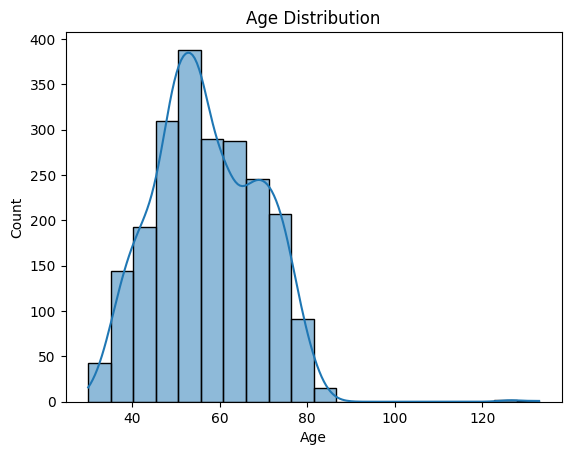

In [230]:
#  EDA
sns.histplot(df['Age'],bins=20,kde=True)
plt.title("Age Distribution")

Text(0.5, 1.0, 'Income Distribution')

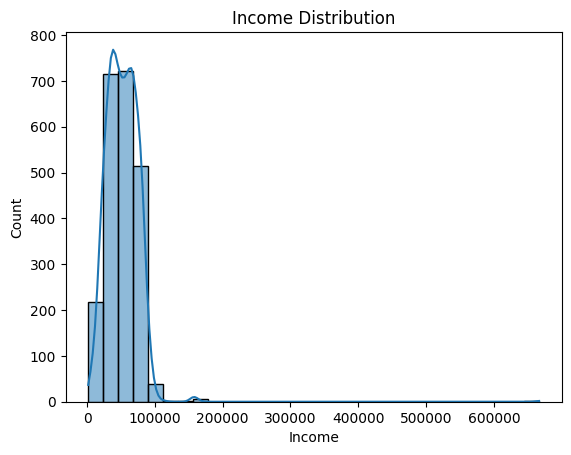

In [231]:
sns.histplot(df['Income'],bins=30,kde=True)
plt.title("Income Distribution")

Text(0.5, 1.0, 'Total Spending Distribution')

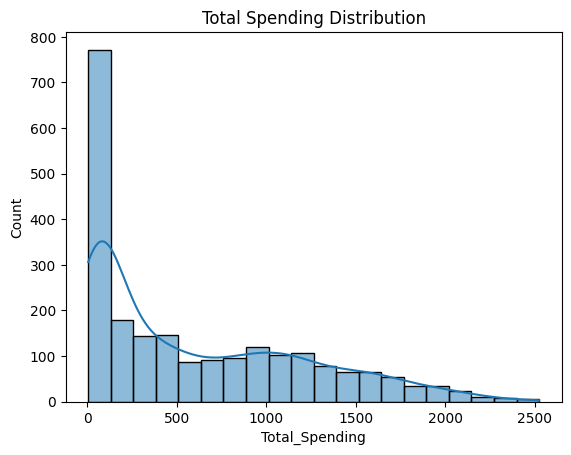

In [232]:
sns.histplot(df['Total_Spending'],bins=20,kde=True)
plt.title("Total Spending Distribution")

<Axes: xlabel='Education', ylabel='Income'>

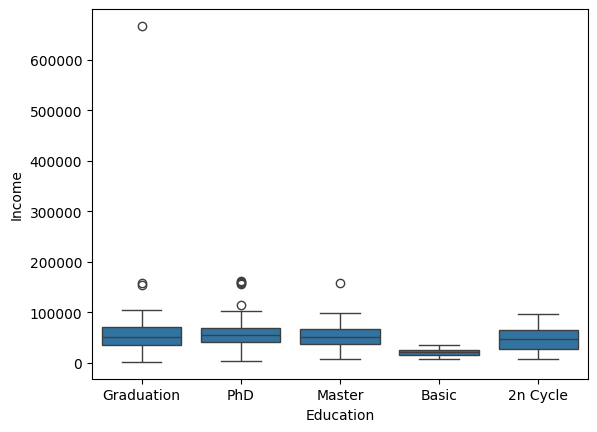

In [233]:
sns.boxplot(x='Education',y='Income',data=df)

<Axes: xlabel='Education', ylabel='Income'>

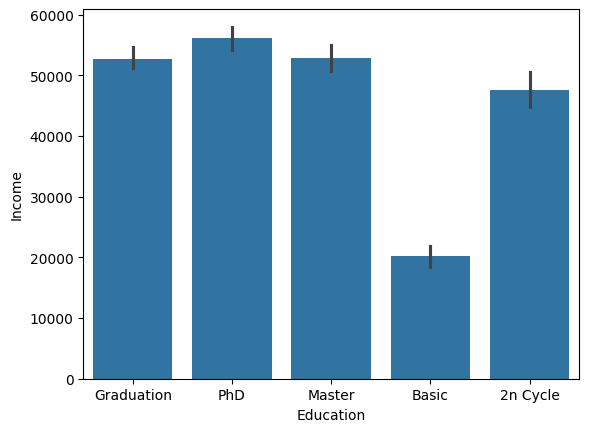

In [234]:
sns.barplot(x='Education',y='Income',data=df)

<Axes: xlabel='Marital_Status', ylabel='Total_Spending'>

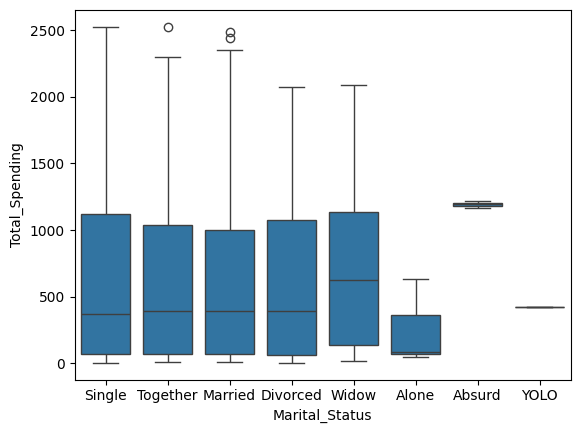

In [235]:
# sns.barplot(x='Marital_Status',y='Total_Spending',data=df)
sns.boxplot(x='Marital_Status',y='Total_Spending',data=df)

In [236]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Total_Child', 'Total_Spending', 'Customer_since'],
      dtype='str')

In [237]:
Corr=df[['Complain','Income','Age','Recency','Total_Spending']].corr()
Corr

,Complain,Income,Age,Recency,Total_Spending
Complain,1.000000,-0.027225,0.030407,0.013637,-0.037428
Income,-0.027225,1.000000,0.161791,-0.003970,0.667576
Age,0.030407,0.161791,1.000000,0.016295,0.113487
Recency,0.013637,-0.003970,0.016295,1.000000,0.020066
Total_Spending,-0.037428,0.667576,0.113487,0.020066,1.000000


<Axes: >

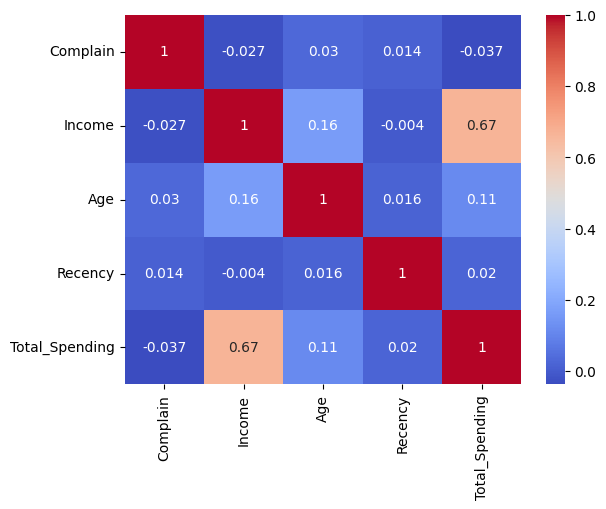

In [238]:
sns.heatmap(Corr,annot=True,cmap='coolwarm')

In [239]:
pivot_income=df.pivot_table(values='Income',index='Education',columns='Marital_Status',aggfunc='mean')

In [240]:
pivot_income

Marital_Status,Absurd,Alone,Divorced,Married,Single,Together,Widow,YOLO
Education,,,,,,,,
2n Cycle,NaN,NaN,49395.130435,46201.100000,53673.944444,44736.410714,51392.200000,NaN
Basic,NaN,NaN,9548.000000,21960.500000,18238.666667,21240.071429,22123.000000,NaN
Graduation,79244.0,34176.0,54526.042017,50800.258741,51322.182927,55758.480702,54976.657143,NaN
Master,65487.0,61331.0,50331.945946,53286.028986,53530.560000,52109.009804,58401.545455,NaN
PhD,NaN,35860.0,53096.615385,58138.031579,53314.614583,56041.422414,60288.083333,48432.0


In [241]:
# avg spending by education
# df[df['Total_Spending'].mean()]
g1=df.groupby('Education')['Total_Spending'].mean().sort_values(ascending=False)
g1

Education
PhD           676.733888
Graduation    621.686380
Master        609.767123
2n Cycle      494.930000
Basic          81.796296
Name: Total_Spending, dtype: float64

<Axes: xlabel='Education'>

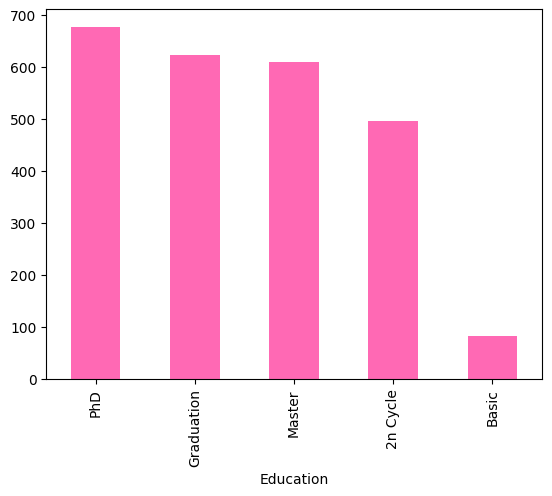

In [242]:
g1.plot(kind='bar',color='hotpink')

In [243]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Total_Child', 'Total_Spending', 'Customer_since'],
      dtype='str')

In [244]:
df['AcceptedAny']=df[['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2','Response']].sum(axis=1)
df['AcceptedAny'].unique()
# g2=df.groupby('Marital_Status')['Campaign']
# 5 acccpted all 5 campaign

array([1, 0, 3, 2, 4, 5], dtype=int64)

In [245]:
df['AcceptedAny']=df['AcceptedAny'].apply(lambda x : 1 if x > 0 else 0)

In [246]:
df.AcceptedAny.unique()

array([1, 0], dtype=int64)

In [247]:
g2=df.groupby('Marital_Status')['AcceptedAny'].mean().sort_values()

In [248]:
g2

Marital_Status
Together    0.251309
Married     0.252042
Divorced    0.297414
Single      0.312102
Alone       0.333333
Widow       0.342105
Absurd      0.500000
YOLO        0.500000
Name: AcceptedAny, dtype: float64

In [249]:
bins=[18,30,40,50,60,70,80]
labels=['18-29','30-39','40-49','50-59','60-69','70+']


In [250]:
df['AgeGroup']=pd.cut(df['Age'],bins=bins,labels=labels)

In [251]:
df['AgeGroup'].unique()

['60-69', '70+', '40-49', '50-59', '30-39', NaN, '18-29']
Categories (6, str): ['18-29' < '30-39' < '40-49' < '50-59' < '60-69' < '70+']

In [252]:
g3=df.groupby('AgeGroup')['Income'].mean().sort_values(ascending=False)

In [253]:
g3

AgeGroup
70+      58190.713018
60-69    55980.030928
50-59    50479.321534
40-49    48057.587649
30-39    47905.475676
18-29    10960.500000
Name: Income, dtype: float64

<Axes: ylabel='AgeGroup'>

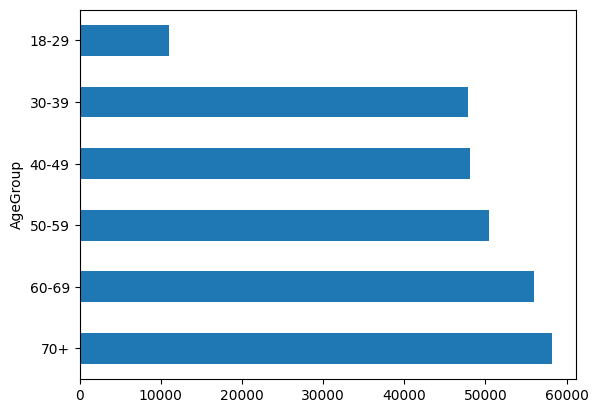

In [254]:
g3.plot(kind='barh')

In [255]:
df.shape

(2216, 35)

In [256]:
# ❌ Identifiers / Leakage

# ID
# Dt_Customer (already converted)
# Customer_since (raw date/tenure not needed directly)

# ❌ Campaign Outcomes (cause bias)
# AcceptedCmp1–5
# AcceptedAny
# Response
# 👉 These are results, not behaviors.

# ❌ Constants / Useless
# Z_CostContact
# Z_Revenue

# Recency
# Total_Spending : Instead of all raw spend columns, you have
# NumWebPurchases
# NumCatalogPurchases
# NumStorePurchases

# 👉 This defines behavioral + monetary value.
# Very useful for actionable segments:
# NumWebVisitsMonth
# NumDealsPurchases

# Use lightly — don’t over-weight:
# Income
# Age
# Total_Child

# Clustering should group customers by behavior and value, not by who they are.
# Behavior > Demographics
# That’s why RFM + spending dominates.

In [257]:
features = [
    "Recency",
    "Total_Spending",
    "NumWebPurchases",
    "NumStorePurchases",
    "NumCatalogPurchases",
    "NumDealsPurchases",
    "NumWebVisitsMonth",
    "Income",
    "Age",
]


In [258]:
X=df[features]

In [259]:
X

,Recency,Total_Spending,NumWebPurchases,NumStorePurchases,NumCatalogPurchases,NumDealsPurchases,NumWebVisitsMonth,Income,Age
0,58,1617,8,4,10,3,7,58138.0,69
1,38,27,1,2,1,2,5,46344.0,72
2,26,776,8,10,2,1,4,71613.0,61
3,26,53,2,4,0,2,6,26646.0,42
4,94,422,5,6,3,5,5,58293.0,45
...,...,...,...,...,...,...,...,...,...
2235,46,1341,9,4,3,2,5,61223.0,59
2236,56,444,8,5,2,7,7,64014.0,80
2237,91,1241,2,13,3,1,6,56981.0,45
2238,8,843,6,10,5,2,3,69245.0,70


In [260]:
#  Preprocess
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_Scaled=scaler.fit_transform(X)

In [261]:
X_Scaled

array([[ 0.31053212,  1.67548812,  1.42855332, ...,  0.69323197,
         0.2340627 ,  0.98644293],
       [-0.38050944, -0.96235832, -1.12588116, ..., -0.1315745 ,
        -0.23455948,  1.23680074],
       [-0.79513438,  0.28024985,  1.42855332, ..., -0.54397773,
         0.76947764,  0.31882209],
       ...,
       [ 1.4507507 ,  1.05169551, -0.76096195, ...,  0.28082874,
         0.18809052, -1.01641959],
       [-1.41707178,  0.39140438,  0.6987149 , ..., -0.95638097,
         0.67538765,  1.06989553],
       [-0.31140528, -0.7218    , -0.39604274, ...,  0.69323197,
         0.02470453,  1.23680074]])

In [262]:
from sklearn.cluster import KMeans

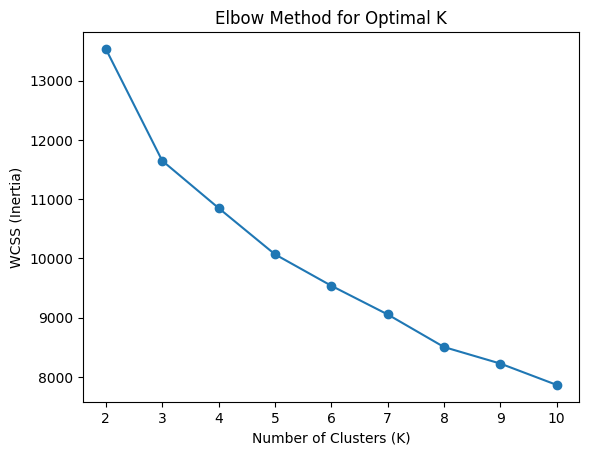

In [263]:
# Elbow Method 
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
#  Within-Cluster Sum of Squares
# WCSS measures how compact your clusters are.
# It sums the squared distance between each data point and its cluster centroid.
# 🔹 Why WCSS matters
# Lower WCSS = tighter clusters
# As K increases, WCSS always decreases (more clusters fit data better)
# You dont minimize WCSS blindly → you look for the Elbow

# 🔹 Elbow Method (how you used it)
# Run KMeans for multiple K values
# Plot K vs WCSS
# Choose K where the rate of decrease sharply slows
# That “bend” is the optimal K (best trade-off between simplicity & fit)

wcss = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_Scaled)
    wcss.append(kmeans.inertia_)

plt.figure()
plt.plot(K, wcss, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS (Inertia)")
plt.title("Elbow Method for Optimal K")
plt.show()


In [264]:
wcss

[13536.304098337536,
 11649.018121433406,
 10850.129213812363,
 10068.932073119537,
 9538.01771043677,
 9053.644406686959,
 8503.115759981265,
 8223.66590577268,
 7863.423084619185]

In [265]:
from sklearn.metrics import silhouette_score

silhouette_scores = {}

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_Scaled)
    score = silhouette_score(X_Scaled, labels)
    silhouette_scores[k] = score
    print(f"K = {k}, Silhouette Score = {score:.3f}")

# The Silhouette Score measures how well-separated and cohesive your clusters are.
# It combines two ideas:
# Cohesion → how close points are within the same cluster
# Separation → how far points are from other clusters

# For each point:
# a = average distance to points in its own cluster
# b = average distance to points in the nearest other cluster

# sil=b-a/max(a,b)
# Range: -1 to +1

K = 2, Silhouette Score = 0.315
K = 3, Silhouette Score = 0.270
K = 4, Silhouette Score = 0.186
K = 5, Silhouette Score = 0.172
K = 6, Silhouette Score = 0.169
K = 7, Silhouette Score = 0.167
K = 8, Silhouette Score = 0.166
K = 9, Silhouette Score = 0.154
K = 10, Silhouette Score = 0.164


| Score Range    | Meaning                                                  |
| -------------- | -------------------------------------------------------- |
| **0.5 – 1.0**  | Very strong, well-separated clusters (rare in real data) |
| **0.25 – 0.5** | Reasonable structure (common in customer data)           |
| **0 – 0.25**   | Weak but usable                                          |
| **< 0**        | Incorrect clustering                                     |


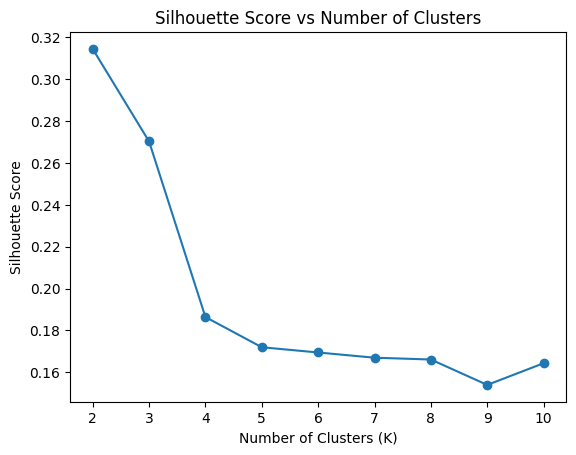

In [266]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

K = range(2, 11)
scores = []

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_Scaled)
    scores.append(silhouette_score(X_Scaled, labels))

plt.figure()
plt.plot(K, scores, marker="o")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score vs Number of Clusters")
plt.show()


In [267]:
# 1️⃣ What your metrics are really saying
# 🔹 WCSS (Elbow)

# Your WCSS curve:
# K=2 → big drop
# K=3 → good drop
# K=4+ → diminishing returns

# 👉 Clear elbow around K = 3
# This means:
# Clusters after 3 are not adding meaningful separation
# Model complexity increases without business gain
# ✔️ K=3 is correct from an optimization perspective
# 🔹 Silhouette Score

# Your scores:
# K	Silhouette
# 2	0.315
# 3	0.270
# 4	0.186
# 5+	↓

# Interpretation (IMPORTANT):
# 0.25–0.35 → Reasonable segmentation for real customer data
# Perfect clusters (>0.5) are rare in behavioral datasets
# Marketing / customer data is naturally overlapping
# 👉 K=2 is mathematically best, but…

# 2️⃣ Why you should NOT choose K = 2
# With K=2, clusters become:
# High value vs Everyone else ❌
# Too coarse
# No actionable middle segment

# With K=3, you get:
# Loyal High-Value
# Deal-Driven Active
# Low-Value Passive

# ✔️ Business-actionable
# ✔️ Matches RFM logic
# ✔️ Enables differentiated retention strategies
# In applied ML, business separability > metric perfection

In [268]:
kmeans=KMeans(n_clusters=3,random_state=42, n_init=10)
df['Cluster']=kmeans.fit_predict(X_Scaled)

In [269]:
df['Cluster'].value_counts()

Cluster
0    994
1    685
2    537
Name: count, dtype: int64

In [270]:
cluster_profile = df.groupby("Cluster")[features].mean().round(2)
cluster_profile


,Recency,Total_Spending,NumWebPurchases,NumStorePurchases,NumCatalogPurchases,NumDealsPurchases,NumWebVisitsMonth,Income,Age
Cluster,,,,,,,,,
0,49.07,92.08,2.02,3.19,0.54,1.88,6.37,34339.50,54.69
1,49.71,1288.52,5.02,8.39,5.77,1.38,2.85,76205.63,58.61
2,48.02,691.09,6.72,7.34,2.67,4.35,6.52,54833.51,59.96


In [271]:
segment_map = {
    0: "Low-Value Passive Customers",
    1: "Loyal High-Value Customers",
    2: "Deal-Driven Active Customers"
}

df["Segment_Name"] = df["Cluster"].map(segment_map)


In [272]:
df["Segment_Name"].value_counts(normalize=True) * 100


Segment_Name
Low-Value Passive Customers     44.855596
Loyal High-Value Customers      30.911552
Deal-Driven Active Customers    24.232852
Name: proportion, dtype: float64

In [273]:
g5=df.groupby('Segment_Name')['Total_Spending'].sum().sort_values(ascending=False)

In [274]:
g5

Segment_Name
Loyal High-Value Customers      882633
Deal-Driven Active Customers    371118
Low-Value Passive Customers      91528
Name: Total_Spending, dtype: int64

In [275]:
g5 = df.groupby('Segment_Name')['Total_Spending'].sum()

contribution = (g5 / g5.sum()) * 100

contribution = contribution.sort_values(ascending=False)

print(contribution)
# segment_sum / total_sum



Segment_Name
Loyal High-Value Customers      65.609662
Deal-Driven Active Customers    27.586694
Low-Value Passive Customers      6.803644
Name: Total_Spending, dtype: float64


In [276]:
result = df.groupby('Segment_Name')['Total_Spending'].sum().to_frame()

result['Contribution_%'] = (result['Total_Spending'] / result['Total_Spending'].sum()) * 100

result = result.sort_values('Contribution_%', ascending=False)

result
# 30 % of customer contribute to 60 % of revenue 

,Total_Spending,Contribution_%
Segment_Name,,
Loyal High-Value Customers,882633,65.609662
Deal-Driven Active Customers,371118,27.586694
Low-Value Passive Customers,91528,6.803644


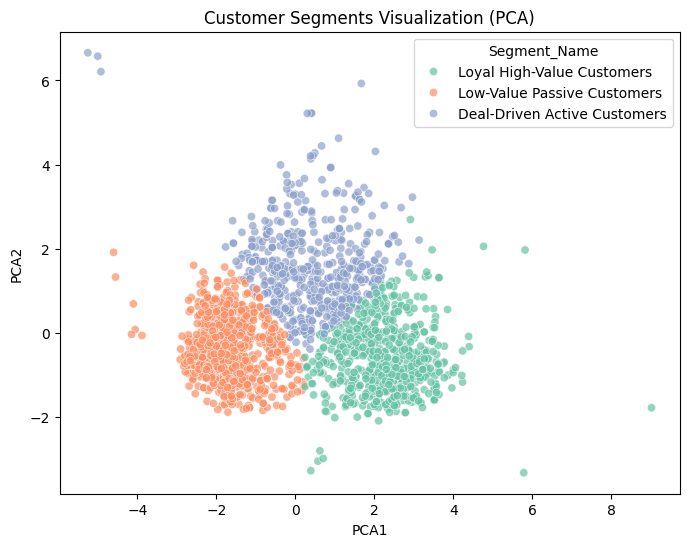

In [277]:
# This shows how well clusters are separated.
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
# PCA → used for dimensionality reduction
pca = PCA(n_components=2)
# reduce your data to 2 new features
X_pca = pca.fit_transform(X_Scaled)

df["PCA1"] = X_pca[:, 0]
#  All rows column 0
df["PCA2"] = X_pca[:, 1]

# column index 0 → first principal component

# column index 1 → second principal component
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df,
    x="PCA1",
    y="PCA2",
    hue="Segment_Name",
    palette="Set2",
    alpha=0.7
)
plt.title("Customer Segments Visualization (PCA)")
plt.show()


# You started with many features in X_Scaled.

# PCA compresses them into:

# PCA1 → direction of maximum variance

# PCA2 → second most important direction

# This plot shows:

# 👉 how customers are distributed in a 2-D representation of the original data
# 👉 whether your segments are clearly separated or overlapping

| Metric            | Meaning                         | From Your Dataset         |
| ----------------- | ------------------------------- | ------------------------- |
| **Recency (R)**   | How recently customer purchased | `Recency` (already given) |
| **Frequency (F)** | How often customer purchases    | Purchase counts           |
| **Monetary (M)**  | How much customer spends        | Spending columns          |


In [ ]:
# RFM Distribution by Cluster (Boxplots)
# This explains why clusters are different.
# 1. Recency 
# # Recency = number of days since last purchase
# # (lower is better)
# 2. Frequency  : Purchase Frequency
# 3. Monetary : Total Spendings

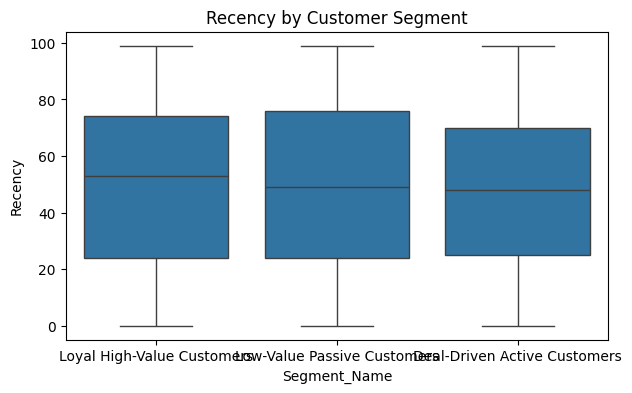

In [278]:
plt.figure(figsize=(7,4))
sns.boxplot(x="Segment_Name", y="Recency", data=df)
plt.title("Recency by Customer Segment")
plt.show()


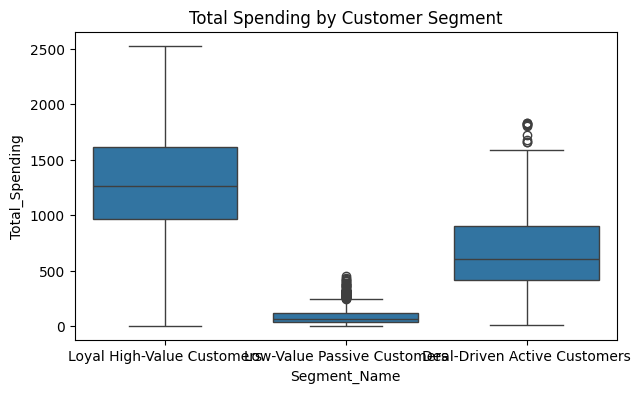

In [279]:
plt.figure(figsize=(7,4))
sns.boxplot(x="Segment_Name", y="Total_Spending", data=df)
plt.title("Total Spending by Customer Segment")
plt.show()


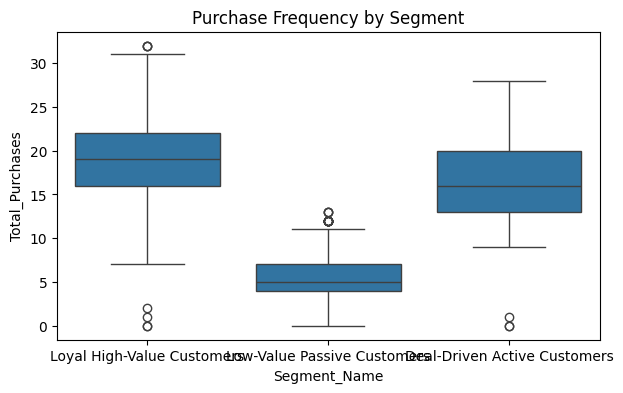

In [280]:
df["Total_Purchases"] = (
    df["NumWebPurchases"] +
    df["NumStorePurchases"] +
    df["NumCatalogPurchases"]
)

plt.figure(figsize=(7,4))
sns.boxplot(x="Segment_Name", y="Total_Purchases", data=df)
plt.title("Purchase Frequency by Segment")
plt.show()


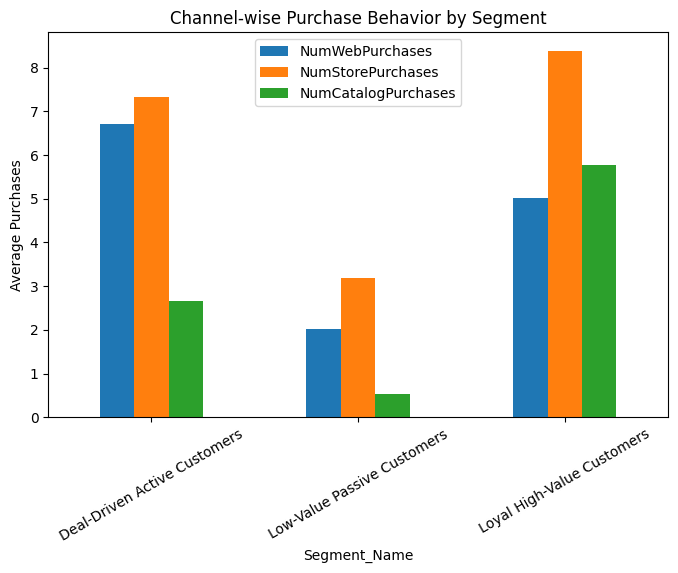

In [281]:
channel_means = df.groupby("Segment_Name")[
    ["NumWebPurchases", "NumStorePurchases", "NumCatalogPurchases"]
].mean()

channel_means.plot(kind="bar", figsize=(8,5))
plt.title("Channel-wise Purchase Behavior by Segment")
plt.ylabel("Average Purchases")
plt.xticks(rotation=30)
plt.show()
# This helps marketing teams decide channel strategy.


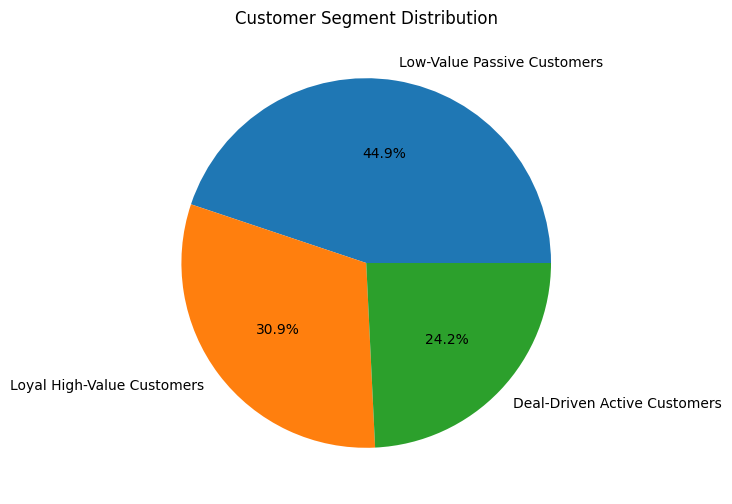

In [282]:
df["Segment_Name"].value_counts().plot(
    kind="pie",
    autopct="%1.1f%%",
    figsize=(6,6)
)
plt.title("Customer Segment Distribution")
plt.ylabel("")
plt.show()


In [283]:
df["Frequency"] = (
    df["NumWebPurchases"] +
    df["NumStorePurchases"] +
    df["NumCatalogPurchases"]
)
df["Monetary"] = df["Total_Spending"]


In [284]:
df["R_Score"] = pd.qcut(df["Recency"], 5, labels=[5,4,3,2,1])
df["F_Score"] = pd.qcut(df["Frequency"].rank(method="first"), 5, labels=[1,2,3,4,5])
df["M_Score"] = pd.qcut(df["Monetary"], 5, labels=[1,2,3,4,5])

# Low recency = good → score 5
# High frequency & spending = good → score 5
# Your scores are categorical, not numeric.
# Convert them to numeric first, then .mean() will work.


In [285]:
df["RFM_Score"] = (
    df["R_Score"].astype(int) +
    df["F_Score"].astype(int) +
    df["M_Score"].astype(int)
)


In [286]:
df["Segment_Name"] = df["Segment_Name"].astype("category")


In [287]:
df[["R_Score","F_Score","M_Score","RFM_Score"]].dtypes


R_Score      category
F_Score      category
M_Score      category
RFM_Score       int32
dtype: object

In [288]:
cols = ["R_Score","F_Score","M_Score","RFM_Score"]

df[cols] = df[cols].apply(pd.to_numeric)


In [289]:
df.groupby("Segment_Name", observed=True)[
    ["R_Score","F_Score","M_Score","RFM_Score"]
].mean()


,R_Score,F_Score,M_Score,RFM_Score
Segment_Name,,,,
Deal-Driven Active Customers,3.040968,3.845438,3.566108,10.452514
Low-Value Passive Customers,3.018109,1.677062,1.673038,6.368209
Loyal High-Value Customers,2.981022,4.254015,4.477372,11.712409


In [ ]:
#  Evaluation 
# KMeans is unsupervised
# No true labels → no prediction error
# So RMSE, Accuracy, F1 ❌
# Instead, we evaluate cluster compactness & separation.

# 1.
# Inertia (WCSS) → Closest to MSE
# Within-Cluster Sum of Squares
# Sum of squared distances between points and their cluster centroids
# kmeans.inertia_
# 🔹 Lower = better
# 🔹 Used in Elbow Method
# 🔹 Similar to training MSE (but no absolute threshold)

# 2. 
# Silhouette Score ⭐ (MOST IMPORTANT)
# Measures:
# How close points are to their own cluster
# How far from other clusters
# Range: -1 → +1
# Score	Meaning
# > 0.5	Excellent
# 0.3 – 0.5	Good
# < 0.3	Weak

# 👉 This is the best single metric to report.


In [290]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

print("Inertia:", kmeans.inertia_)
print("Silhouette Score:", silhouette_score(X_Scaled, kmeans.labels_))
# print("Calinski-Harabasz:", calinski_harabasz_score(X_Scaled, kmeans.labels_))
# print("Davies-Bouldin:", davies_bouldin_score(X_Scaled, kmeans.labels_))


Inertia: 11649.018121433406
Silhouette Score: 0.2703037588147683


In [291]:
# Why KMeans Over Hierarchical Clustering

# Scales efficiently to large datasets, making it suitable for real-world customer segmentation problems.

# Computationally faster and memory-efficient compared to hierarchical clustering, which has O(n²) complexity.

# Produces easily interpretable clusters based on centroids, which helps in profiling and business decision-making.

# Allows flexibility in choosing the optimal number of clusters using Elbow and Silhouette methods.

# More suitable for production deployment, as clusters can be updated easily when new customer data is added.

In [293]:
#  Download Model 
import joblib 
joblib.dump(kmeans,'kmeans_model.pkl')
joblib.dump(scaler,'scaler.pkl')

['scaler.pkl']

In [295]:
df["Churn_Label"] = (df["RFM_Score"] <= 6).astype(int)

# Check churn rate
df["Churn_Label"].value_counts(normalize=True) * 100


Churn_Label
0    76.037906
1    23.962094
Name: proportion, dtype: float64

In [ ]:
# The dataset is NOT churn-heavy
# Churn is rare
# Any churn model will:
# Overfit easily
# Predict mostly “No Churn”
# Look good on accuracy but be misleading

# 👉 This is a data limitation, not a modeling mistake.
# This dataset is BEST for customer segmentation & RFM analysis.
# Trying to force churn here:

# Weakens project clarity
# Raises uncomfortable interview questions
# Adds unnecessary complexity

In [ ]:
# 1️⃣ Retention Risk Score (Rule-Based, Interpretable)
# Since churn = only ~5.4%, ML will overfit.
# Instead → weighted behavioral risk score (0–100).
# Your project already has strong value:

# ✔ Data cleaning & feature engineering
# ✔ KMeans customer segmentation
# ✔ Proper evaluation (Silhouette, Elbow)
# ✔ RFM behavioral analysis
# ✔ Segment profiling
# ✔ Business strategy mapping
# ✔ Model saved as .pkl
# # ✔ Ready for dashboard / Streamlit

In [296]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Total_Child', 'Total_Spending', 'Customer_since', 'AcceptedAny',
       'AgeGroup', 'Cluster', 'Segment_Name', 'PCA1', 'PCA2',
       'Total_Purchases', 'Frequency', 'Monetary', 'R_Score', 'F_Score',
       'M_Score', 'RFM_Score', 'Churn_Label'],
      dtype='str')

In [297]:
df.RFM_Score.unique()

array([13,  6, 12,  7, 11,  8,  4,  5,  9, 14, 10,  3, 15])

In [ ]:
# We’ll group them logically:

# 🕒 Engagement / Recency (40%)
# Recency
# NumWebVisitsMonth
# Frequency (inverse effect)

# 💰 Value / Spending (30%)
# Total_Spending
# Monetary
# Total_Purchases

# 🎯 Offer Sensitivity (15%)

# NumDealsPurchases

# AcceptedAny

# 👨‍👩‍👧 Lifecycle / Profile (15%)

# Customer_since

# Total_Child

# AgeGroup

In [ ]:
# df["Retention_Risk_Score"] = (
#     0.4 * df["R_Score"] +
#     0.3 * df["F_Score"] +
#     0.3 * df["M_Score"]
# )

# df["Risk_Level"] = pd.cut(
#     df["Retention_Risk_Score"],
#     bins=[-1, 2.5, 3.5, 5],
#     labels=["High Risk", "Medium Risk", "Low Risk"]
# )
# df['Recency_norm'] = df['Recency'] / df['Recency'].max()
# df['Visits_norm'] = df['NumWebVisitsMonth'] / df['NumWebVisitsMonth'].max()
# df['Spend_norm'] = 1 - (df['Total_Spending'] / df['Total_Spending'].max())
# df['Freq_norm'] = 1 - (df['Frequency'] / df['Frequency'].max())
# df['Tenure_norm'] = 1 - (df['Customer_since'] / df['Customer_since'].max())

# df['Retention_Risk_Score'] = (
#     0.40 * (df['Recency_norm'] + df['Visits_norm']) / 2 +
#     0.30 * (df['Spend_norm'] + df['Freq_norm']) / 2 +
#     0.15 * (df['NumDealsPurchases'] / df['NumDealsPurchases'].max()) +
#     0.15 * df['Tenure_norm']
# ) * 100
# # Higher score = higher churn risk → needs retention action.

# df['Risk_Level'] = pd.cut(
#     df['Retention_Risk_Score'],
#     bins=[0, 30, 60, 100],
#     labels=['Low Risk', 'Medium Risk', 'High Risk']
# )

# # Risk Level	Meaning
# # Low	Stable & loyal
# # Medium	Needs engagement
# # High	Likely to churn

In [298]:
df["Retention_Risk_Level"] = pd.cut(
    df["RFM_Score"],
    bins=[0, 6, 10, 15],
    labels=["High Risk", "Medium Risk", "Low Risk"]
)


In [299]:
df["Retention_Risk_Level"] 

0          Low Risk
1         High Risk
2          Low Risk
3       Medium Risk
4       Medium Risk
           ...     
2235       Low Risk
2236    Medium Risk
2237    Medium Risk
2238       Low Risk
2239    Medium Risk
Name: Retention_Risk_Level, Length: 2216, dtype: category
Categories (3, str): ['High Risk' < 'Medium Risk' < 'Low Risk']

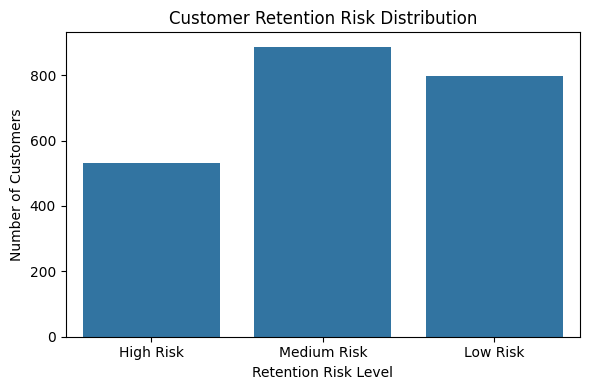

In [300]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(
    x="Retention_Risk_Level",
    data=df,
    order=["High Risk", "Medium Risk", "Low Risk"],
)

plt.title("Customer Retention Risk Distribution")
plt.xlabel("Retention Risk Level")
plt.ylabel("Number of Customers")
plt.tight_layout()
plt.show()


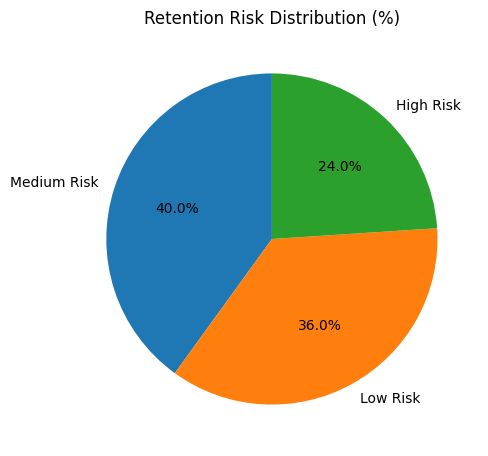

In [301]:
risk_pct = df["Retention_Risk_Level"].value_counts(normalize=True) * 100

plt.figure(figsize=(5,5))
plt.pie(
    risk_pct,
    labels=risk_pct.index,
    autopct="%1.1f%%",
    startangle=90
)
plt.title("Retention Risk Distribution (%)")
plt.tight_layout()
plt.show()


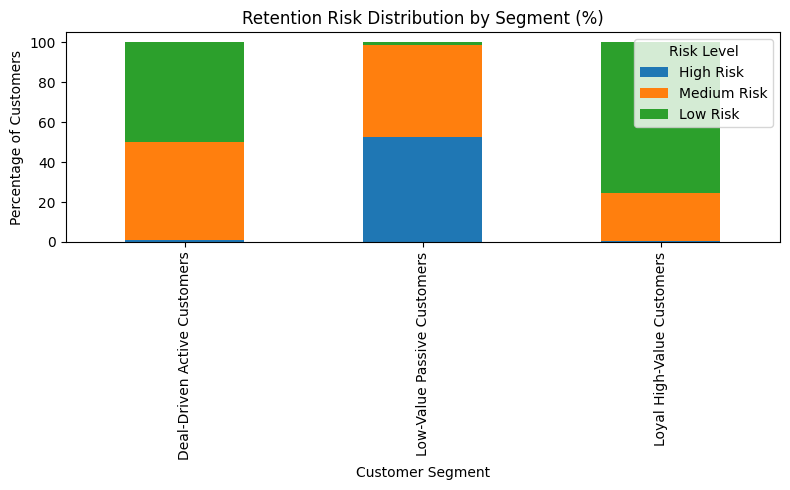

In [302]:
segment_risk = pd.crosstab(
    df["Segment_Name"],
    df["Retention_Risk_Level"],
    normalize="index"
) * 100

segment_risk.plot(
    kind="bar",
    stacked=True,
    figsize=(8,5)
)

plt.title("Retention Risk Distribution by Segment (%)")
plt.xlabel("Customer Segment")
plt.ylabel("Percentage of Customers")
plt.legend(title="Risk Level")
plt.tight_layout()
plt.show()


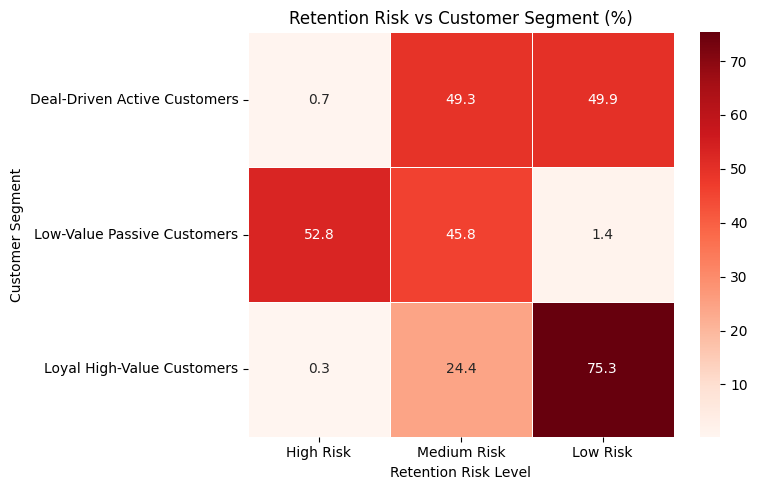

In [304]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cross-tabulation
heatmap_data = pd.crosstab(
    df["Segment_Name"],
    df["Retention_Risk_Level"],
    normalize="index"
) * 100

# Plot
plt.figure(figsize=(8, 5))
sns.heatmap(
    heatmap_data,
    annot=True,
    fmt=".1f",
    cmap="Reds",
    linewidths=0.5
)

plt.title("Retention Risk vs Customer Segment (%)")
plt.ylabel("Customer Segment")
plt.xlabel("Retention Risk Level")
plt.tight_layout()
plt.show()


In [306]:
def retention_strategy(segment, risk):
    if segment == "Loyal High-Value Customers":
        if risk == "High Risk":
            return "VIP outreach & exclusive retention offers"
        elif risk == "Medium Risk":
            return "Personalized offers & proactive engagement"
        else:
            return "Loyalty rewards & premium upsell"

    elif segment == "Deal-Driven Active Customers":
        if risk == "High Risk":
            return "Aggressive win-back discounts"
        elif risk == "Medium Risk":
            return "Limited-time promotions & bundles"
        else:
            return "Gamified rewards & loyalty points"

    else:  # Low-Value Passive Customers
        if risk == "High Risk":
            return "Minimal investment / allow churn"
        elif risk == "Medium Risk":
            return "Reactivation email campaign"
        else:
            return "Low-cost engagement nudges"


In [ ]:
# ✅ Why I Did NOT Use an ML Model for Churn
# (And Used RFM Rule-Based Risk Instead)
# 1️⃣ No Ground-Truth Churn Label Available

# The dataset does not contain a real churn indicator (e.g., account closure, unsubscribe, inactivity window).

# Any ML churn model would require a synthetic label, which reduces credibility.

# 📌 Using ML without true labels leads to misleading performance.

# 2️⃣ Rule-Based Churn Avoids Label Leakage

# RFM rules are derived from business logic, not learned from the same features used for prediction.

# ML models trained on rule-based churn labels simply relearn the rules, causing label leakage.

# 📌 This gives artificially high accuracy without real predictive value.

# 3️⃣ Severe Class Imbalance Makes ML Unreliable

# Rule-based churn resulted in ~5% churn rate, which is realistic.

# Training ML models on such imbalanced synthetic labels leads to:

# Overfitting

# Unstable predictions

# Poor generalization

# 📌 Risk scoring is more stable than classification here.

# 4️⃣ RFM Is an Industry-Standard Retention Framework

# RFM analysis is widely used in marketing, CRM, and consulting for retention decisions.

# It directly maps customer behavior to actionable business strategies.

# 📌 The goal is decision-making, not model complexity.

# 5️⃣ Business Interpretability > Model Complexity

# RFM-based risk scores are:

# Transparent

# Explainable to non-technical stakeholders

# Easy to operationalize

# 📌 Retention teams prefer interpretable risk tiers over black-box churn scores.

# 6️⃣ Consulting-Grade Outcome Focus

# The project prioritizes:

# Segment identification

# Risk assessment

# Retention action design

# 📌 This mirrors how real consulting and analytics teams work.

# “The dataset didn’t contain a true churn ground truth.
# Instead of training a biased model on synthetic labels,
# I implemented an explainable RFM-based retention risk framework, which is more realistic and
# actionable in early-stage or data-limited business environments.”

# Cluster 4

In [ ]:
# kmeans2=KMeans(n_clusters=4,random_state=42, n_init=10)
# df['Cluster']=kmeans2.fit_predict(X_Scaled)

In [ ]:
# df['Cluster'].value_counts()

Cluster
1    679
0    538
2    509
3    490
Name: count, dtype: int64

In [ ]:
# cluster_profile = df.groupby("Cluster")[features].mean().round(2)
# cluster_profile

,Recency,Total_Spending,NumWebPurchases,NumStorePurchases,NumCatalogPurchases,NumDealsPurchases,NumWebVisitsMonth,Income,Age
Cluster,,,,,,,,,
0,25.03,96.88,2.04,3.21,0.53,1.86,6.47,33634.57,52.83
1,49.36,1295.29,5.03,8.37,5.80,1.37,2.86,76315.54,58.45
2,75.70,116.84,2.26,3.42,0.67,2.05,6.24,36395.04,56.94
3,47.14,722.83,6.91,7.56,2.77,4.44,6.50,55798.33,60.43


In [ ]:
# segment_map = {
#     0: "Low-Value Passive Customers",
#     1: "Loyal High-Value Customers",
#     2: "Deal-Driven Active Customers",
#     3: 'XYZ'
# }

# df["Segment_Name"] = df["Cluster"].map(segment_map)

# df["Segment_Name"].value_counts(normalize=True) * 100

Segment_Name
Loyal High-Value Customers      30.640794
Low-Value Passive Customers     24.277978
Deal-Driven Active Customers    22.969314
XYZ                             22.111913
Name: proportion, dtype: float64

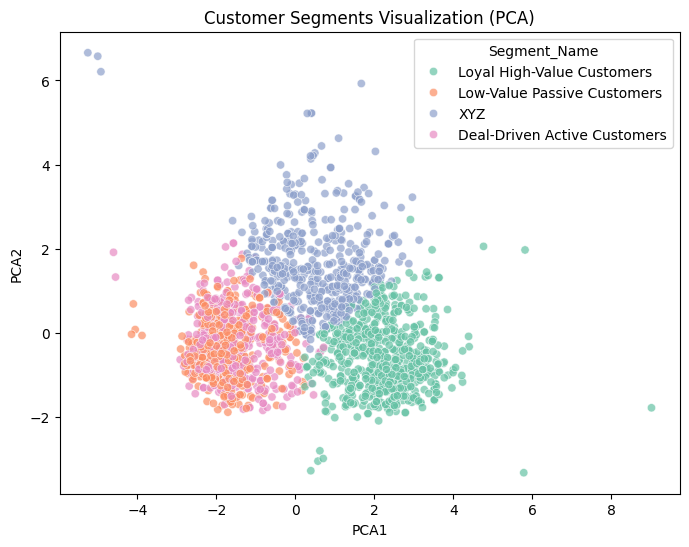

In [ ]:







# # This shows how well clusters are separated.
# from sklearn.decomposition import PCA
# import matplotlib.pyplot as plt
# import seaborn as sns
# # PCA → used for dimensionality reduction
# pca = PCA(n_components=2)
# # reduce your data to 2 new features
# X_pca = pca.fit_transform(X_Scaled)

# df["PCA1"] = X_pca[:, 0]
# #  All rows column 0
# df["PCA2"] = X_pca[:, 1]

# # column index 0 → first principal component

# # column index 1 → second principal component
# plt.figure(figsize=(8,6))
# sns.scatterplot(
#     data=df,
#     x="PCA1",
#     y="PCA2",
#     hue="Segment_Name",
#     palette="Set2",
#     alpha=0.7
# )
# plt.title("Customer Segments Visualization (PCA)")
# plt.show()


# # #  Download Model 
# # import joblib 
# # joblib.dump(kmeans,'kmeans2_model.pkl')
# # joblib.dump(scaler,'scaler2.pkl')

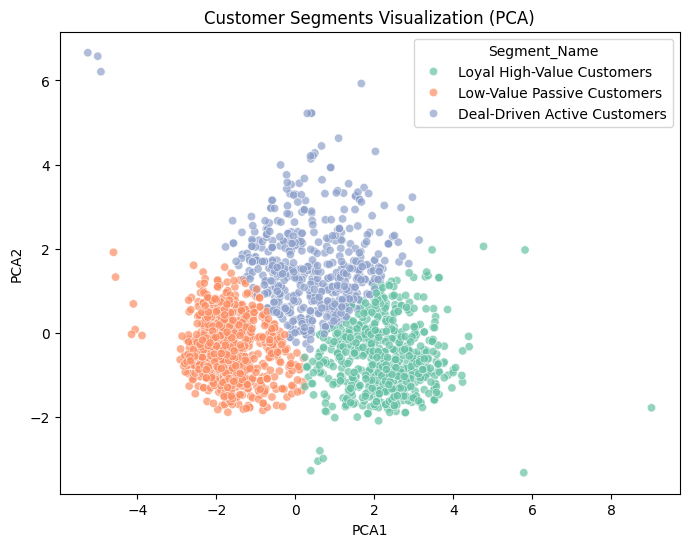